17_neda_mimfpt_(ML_AdaBC)

Engin Abdan

### Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, auc, roc_curve

from sklearn.tree import plot_tree

from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#plt.style.use('classic')
sns.set_style("white")

### Data

In [2]:
stu = pd.read_excel("std_ins_ml_data.xlsx")

In [3]:
stu.head(1)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap


In [4]:
drop_list = ["Unnamed: 0", "Flight_Mean","MI_Cat"]
stu.drop(drop_list, inplace=True, axis=1)
stu.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not
0,20,19,10,16,13,16,17,22,1


### Data infos

In [5]:
stu.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.0,17.72,3.068511,11.0,16.00,17.0,20.0,26.0
Math_Int,100.0,17.75,3.655285,10.0,15.00,17.0,19.0,33.0
Spa_Int,100.0,17.81,3.047420,10.0,15.75,17.5,20.0,26.0
Mus_Int,100.0,17.86,3.110815,10.0,16.00,17.5,20.0,26.0
Nat_Int,100.0,18.16,3.740901,10.0,15.75,18.0,20.0,33.0
Body_Int,100.0,17.20,2.670452,10.0,15.00,17.0,19.0,23.0
Interp_Int,100.0,17.78,2.865962,12.0,16.00,18.0,19.0,26.0
Intrap_Int,100.0,18.07,2.875374,13.0,16.00,18.0,20.0,26.0
Plt_Or_Not,100.0,0.58,0.496045,0.0,0.00,1.0,1.0,1.0


### Data Balance

In [6]:
stu["Plt_Or_Not"].value_counts()

1    58
0    42
Name: Plt_Or_Not, dtype: int64

### Skewness

In [7]:
x = stu.drop(columns=["Plt_Or_Not"]).columns
for i in x:
    if skew(stu[i]) >= -0.5 and skew(stu[i]) < 0.5:
        print(f"{i} \t: {skew(stu[i])} \t>>> Normal")
    elif skew(stu[i]) >= 0.5 and skew(stu[i]) < 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Moderate")
    elif skew(stu[i]) >= 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Heatmap

In [8]:
# plt.figure(figsize=(20,10))
# sns.heatmap(stu.corr(), annot=True, cmap="BrBG")
# plt.tight_layout();

### Pairplot

In [9]:
#sns.pairplot(stu,hue="Plt_Or_Not");

### Corr With Plt_Or_Not

<AxesSubplot:>

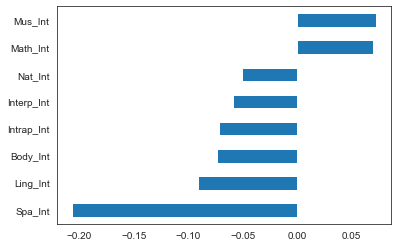

In [10]:
stu.corr()["Plt_Or_Not"].drop("Plt_Or_Not").sort_values().plot.barh()

### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

x = stu.drop(columns=["Plt_Or_Not"], axis=1)
y = stu["Plt_Or_Not"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (70, 8)
Train target shape   :  (70,)
Test features shape  :  (30, 8)
Test target shape    :  (30,)


### AdaC & Model

In [12]:
model = AdaBoostClassifier(random_state=42)
model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [13]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [15]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[26  0]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        44

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



In [14]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 6 10]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.75      0.38      0.50        16
           1       0.55      0.86      0.67        14

    accuracy                           0.60        30
   macro avg       0.65      0.62      0.58        30
weighted avg       0.65      0.60      0.58        30



### AdaC & CV

In [16]:
model = AdaBoostClassifier(random_state=42)

scores = cross_validate(model,
                        x_train,
                        y_train,
                        scoring = ["accuracy",
                                   "precision_macro",
                                   "recall_macro",
                                   "f1_macro"],
                        cv = 10)
                        
df_scores = pd.DataFrame(scores, index = range(1, 11))
print(df_scores)
print("--------------------")
df_scores.mean()[2:]

    fit_time  score_time  test_accuracy  test_precision_macro  \
1   0.128243    0.022376       0.571429              0.333333   
2   0.122517    0.018873       0.714286              0.650000   
3   0.104177    0.017642       0.857143              0.833333   
4   0.099124    0.015694       0.571429              0.541667   
5   0.088090    0.013081       0.285714              0.200000   
6   0.087294    0.012051       0.714286              0.708333   
7   0.077916    0.014463       0.428571              0.416667   
8   0.083682    0.015703       0.571429              0.583333   
9   0.092689    0.010997       0.857143              0.900000   
10  0.075517    0.013954       1.000000              1.000000   

    test_recall_macro  test_f1_macro  
1            0.400000       0.363636  
2            0.650000       0.650000  
3            0.900000       0.844444  
4            0.550000       0.533333  
5            0.250000       0.222222  
6            0.708333       0.708333  
7          

test_accuracy           0.657143
test_precision_macro    0.616667
test_recall_macro       0.629167
test_f1_macro           0.615451
dtype: float64

### Best Number of "n_estimators"

In [17]:
error_rates = []

for n in range(1,100):
    model = AdaBoostClassifier(n_estimators=n)

    model.fit(x_train,y_train)
    test_preds = model.predict(x_test)
    err = 1 - f1_score(y_test, test_preds)
    
    error_rates.append(err)

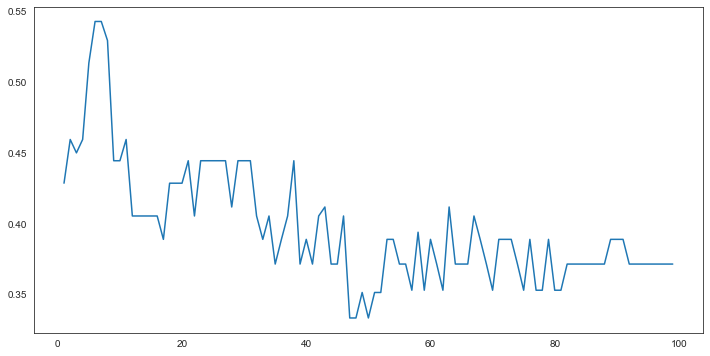

In [18]:
plt.figure(figsize=(12,6))
plt.plot(range(1,100), error_rates)

### AdaC & GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {"n_estimators": [50, 60, 100],
              "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

In [21]:
model = AdaBoostClassifier(random_state=42)

grid_model = GridSearchCV(model,
                          param_grid,
                          scoring = "accuracy",
                          n_jobs = -1,
                          verbose = 2)

In [22]:
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [50, 60, 100]},
             scoring='accuracy', verbose=2)

In [23]:
grid_model.best_estimator_

AdaBoostClassifier(n_estimators=100, random_state=42)

In [24]:
grid_model.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [25]:
y_test_pred = grid_model.predict(x_test)
y_train_pred = grid_model.predict(x_train)

In [26]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[26  0]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        44

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



In [27]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 6 10]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.67      0.38      0.48        16
           1       0.52      0.79      0.63        14

    accuracy                           0.57        30
   macro avg       0.60      0.58      0.55        30
weighted avg       0.60      0.57      0.55        30



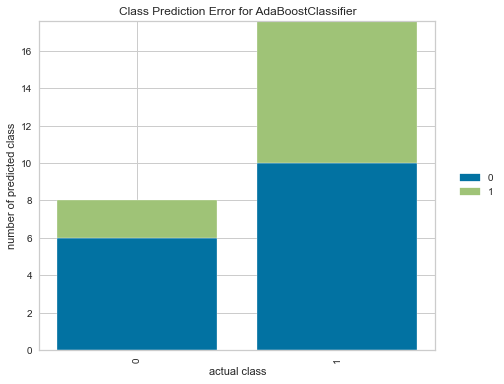

In [28]:
from yellowbrick.classifier import ClassPredictionError
model = AdaBoostClassifier(random_state=42)
visualizer = ClassPredictionError(model)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof();

### Visualize Tree

In [29]:
from sklearn.tree import plot_tree
model = AdaBoostClassifier(random_state=42)
model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [30]:
model.estimators_[0]

DecisionTreeClassifier(max_depth=1, random_state=1608637542)

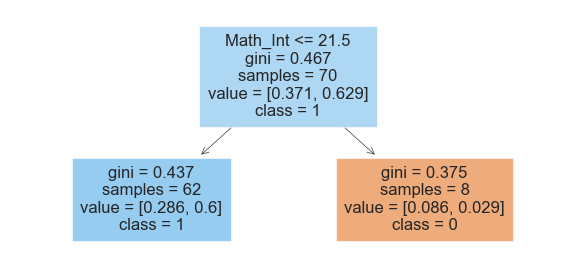

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize = (4,2), dpi = 150)

plot_tree(model.estimators_[0],
          filled = True,
          feature_names = x.columns,
          class_names = ["0", "1"],
          fontsize = 8)
plt.tight_layout();

### Feature Importances

In [32]:
model = AdaBoostClassifier(random_state=42)
model.fit(x_train, y_train)

Feat_Imp = pd.DataFrame(index = x.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
Feat_Imp

,Feat_Imp
Body_Int,0.06
Mus_Int,0.08
Intrap_Int,0.08
Ling_Int,0.10
Spa_Int,0.10
Interp_Int,0.10
Math_Int,0.18
Nat_Int,0.30


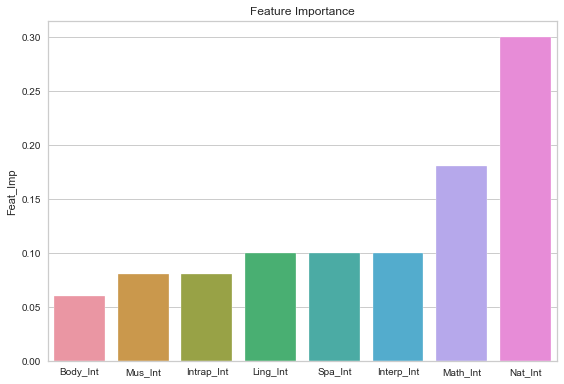

In [33]:
sns.barplot(x=Feat_Imp.index, y=Feat_Imp["Feat_Imp"])
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

### Best Threshold

In [34]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, precision_recall_curve, average_precision_score

In [35]:
from sklearn.ensemble import AdaBoostClassifier 

model = AdaBoostClassifier(random_state=42)
model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [36]:
y_test_pred = model.predict(x_test)
y_test_pred_proba = model.predict_proba(x_test)

In [37]:
test_data = pd.concat([x_test, y_test], axis=1)
test_data["pred_proba"] = y_test_pred_proba[:,1]
test_data["pred1"] = y_test_pred
test_data.head(5)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred_proba,pred1
83,22,19,13,18,21,18,15,19,1,0.693065,1
53,17,13,18,13,13,22,23,20,1,0.663725,1
70,21,16,16,16,19,18,18,20,1,0.516350,1
45,14,14,15,26,20,13,20,14,1,0.714166,1
44,16,17,16,17,21,19,18,20,0,0.528810,1


In [38]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 6 10]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.75      0.38      0.50        16
           1       0.55      0.86      0.67        14

    accuracy                           0.60        30
   macro avg       0.65      0.62      0.58        30
weighted avg       0.65      0.60      0.58        30



In [39]:
y_train_pred_proba = model.predict_proba(x_train)
roc_auc_score(y_train, y_train_pred_proba[:,1])

fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
optimal_threshold_rac

0.5154051373623593

In [40]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_rac else 0)
test_data.head(5)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred_proba,pred1,pred2
83,22,19,13,18,21,18,15,19,1,0.693065,1,1
53,17,13,18,13,13,22,23,20,1,0.663725,1,1
70,21,16,16,16,19,18,18,20,1,0.516350,1,1
45,14,14,15,26,20,13,20,14,1,0.714166,1,1
44,16,17,16,17,21,19,18,20,0,0.528810,1,1


In [41]:
y_pred2 = test_data["pred2"]
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[11  5]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        16
           1       0.67      0.71      0.69        14

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30



In [42]:
y_train_pred_proba = model.predict_proba(x_train)
average_precision_score(y_train, y_train_pred_proba[:,1])

precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold_prc = thresholds[optimal_idx]
optimal_threshold_prc

0.5154051373623593

In [43]:
test_data["pred3"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_prc else 0)
test_data.head()

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred_proba,pred1,pred2,pred3
83,22,19,13,18,21,18,15,19,1,0.693065,1,1,1
53,17,13,18,13,13,22,23,20,1,0.663725,1,1,1
70,21,16,16,16,19,18,18,20,1,0.516350,1,1,1
45,14,14,15,26,20,13,20,14,1,0.714166,1,1,1
44,16,17,16,17,21,19,18,20,0,0.528810,1,1,1


In [44]:
y_pred3 = test_data["pred3"]
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[11  5]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        16
           1       0.67      0.71      0.69        14

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30



### Prediction

In [45]:
model = AdaBoostClassifier(random_state=42)
model.fit(x, y)

AdaBoostClassifier(random_state=42)

In [46]:
columns_name = x.columns

In [47]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [48]:
print("optimal_threshold_rac:", optimal_threshold_rac)
print()
print("optimal_threshold_prc:", optimal_threshold_prc)

optimal_threshold_rac: 0.5154051373623593

optimal_threshold_prc: 0.5154051373623593


In [49]:
predictions1 = model.predict(pred_data)[0]
predictions1

1

In [50]:
predictions_proba = model.predict_proba(pred_data)
print(predictions_proba[0])
print(predictions_proba[0][0])
print(predictions_proba[0][1])

[0.41463335 0.58536665]
0.4146333478701605
0.5853666521298395


In [51]:
predictions2 = [1 if predictions_proba[0][1] >= optimal_threshold_rac else 0][0] 
predictions2

1

In [52]:
pred_data["pred1"] = predictions1
pred_data["pred_proba"] = predictions_proba[0][0]
pred_data["pred2"] = predictions2
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,pred1,pred_proba,pred2
0,35,36,34,37,15,17,19,21,1,0.414633,1


In [53]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Best_Threshold = optimal_threshold_rac

if predictions_proba[0][1] >= Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba\t: {predictions_proba[0][1]}\nPrediction\t\t: 1\nResult\t\t\t: Pilot")
if predictions_proba[0][1] < Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba\t: {predictions_proba[0][1]}\nPrediction\t\t: 0\nResult\t\t\t: Not Pilot")

MI_Cat			: Mus_Int
MI_Score		: 37
Best_Threshold		: 0.5154051373623593
Predictions_Proba	: 0.5853666521298395
Prediction		: 1
Result			: Pilot
